# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](dataset\farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

In [326]:
# All required libraries are imported here for you.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

# Load the dataset
crops = pd.read_csv("dataset\soil_measures.csv")

# Data Exploration
First, I will explore the data and check for the datatypes and whether the data contains missing values.

From **(C2)**, there are no missing data and that all the input (independent) variables are numerical.

In [327]:
# C1
#------
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [328]:
# C2
#-----
# Check for Data types and number of elements
#-----------------------------------------------
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


# Basic Describtive Statistics and Data Visualization
I will have a look over the distribution of the data and perform summary statistics and check for trends in the data.

From **(C3, C4, C5)**, the overall distribution of the data is good however `K` varible has some extreme ouliers that should be removed.  

In [329]:
# C3
#-----
# Summary Statistics
#-----------------------
crops.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>],
       [<AxesSubplot:title={'center':'K'}>,
        <AxesSubplot:title={'center':'ph'}>]], dtype=object)

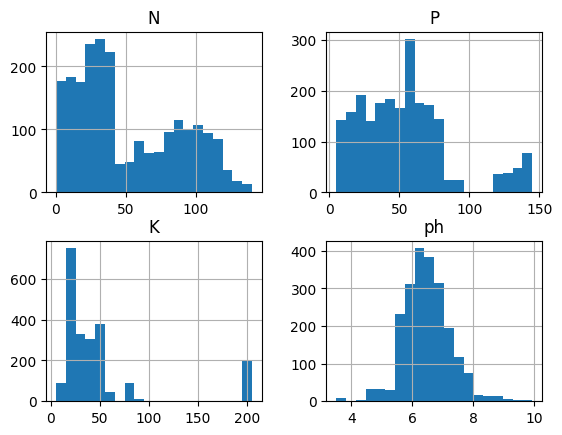

In [330]:
# C4
#-----
# Histogram to visualize the distribution of input values
#-------------------------------------------------------------
crops.select_dtypes("number").hist(bins = 20)

<AxesSubplot:>

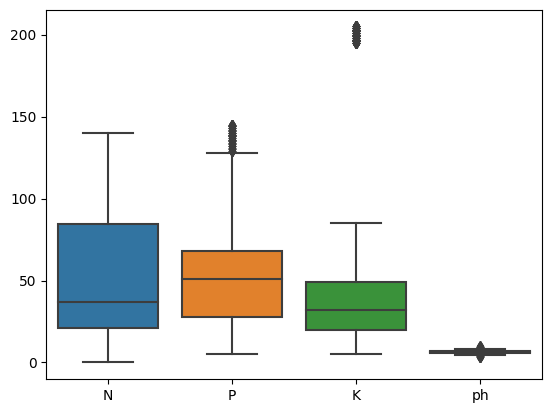

In [331]:
# C5
#-----
# Box plot to visualize the distribution of input values and detect Outliers
#-------------------------------------------------------------
sns.boxplot(crops.select_dtypes("number"))

# Data Cleaning and Preprocessing 
In this step, I will split the data, then start preprocessing which will include rescaling the input variables using `Standard Scaler`.


In [332]:
# C6
#-----
# Splitting the data set
#----------------------------
x = crops.select_dtypes("number")
y = crops["crop"]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state = 42)

In [333]:
# C7
#-----
# Standarizing dataset
#------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

# Model Training and evaluation
In this step I will train the logistic regression model and validate it with cross validation then I will evaluate the model with the test data using f1-score metric.

In [334]:
# C8
#-----
# Logistic regression model training
#--------------------------------------------------------
log_reg = LogisticRegression( multi_class='multinomial')
log_reg.fit(X_train_scaled, Y_train)

LogisticRegression(multi_class='multinomial')

In [335]:
# C9
#-----
# Model evaluation
#--------------------------------
y_pred = log_reg.predict(X_test_scaled)
model_performance = f1_score(Y_test, y_pred, average = 'weighted')
model_performance

0.6790715736844755